# Practice Notebook - Putting It All Together

Hello, coders! Below we have code similar to what we wrote in the last video.  Go ahead and run the following cell that defines our `get_event_date`, `current_users` and `generate_report` methods.

In [1]:
def get_event_date(event):
    return event.date

def current_users(events):
    events.sort(key=get_event_date)
    machines = {}
    for event in events:
        if event.machine not in machines:
            machines[event.machine] = set()
        if event.type == "login":
            machines[event.machine].add(event.user)
        elif event.type == "logout" and event.user in machines[event.machine]:
            machines[event.machine].remove(event.user)
    return machines

def generate_report(machines):
    for machine, users in machines.items():
        if len(users) > 0:
            user_list = ", ".join(users)
            print("{}: {}".format(machine, user_list))

No output should be generated from running the custom function definitions above.  To check that our code is doing everything it's supposed to do, we need an `Event` class.  The code in the next cell below initializes our `Event` class.  Go ahead and run this cell next.

In [2]:
class Event:
    def __init__(self, event_date, event_type, machine_name, user):
        self.date = event_date
        self.type = event_type
        self.machine = machine_name
        self.user = user

Ok, we have an `Event` class that has a constructor and sets the necessary attributes.  Next let's create some events and add them to a list by running the following cell.

In [3]:
events = [
    Event('2020-01-21 12:45:56', 'login', 'myworkstation.local', 'jordan'),
    Event('2020-01-22 15:53:42', 'logout', 'webserver.local', 'jordan'),
    Event('2020-01-21 18:53:21', 'login', 'webserver.local', 'lane'),
    Event('2020-01-22 10:25:34', 'logout', 'myworkstation.local', 'jordan'),
    Event('2020-01-21 08:20:01', 'login', 'webserver.local', 'jordan'),
    Event('2020-01-23 11:24:35', 'logout', 'mailserver.local', 'chris'),
]

Now we've got a bunch of events.  Let's feed these events into our `custom_users` function and see what happens.

In [4]:
users = current_users(events)
print(users)

{'webserver.local': {'lane'}, 'myworkstation.local': set(), 'mailserver.local': set()}


Uh oh.  The code in the previous cell produces an error message.  This is because we have a user in our `events` list that was logged out of a machine he was not logged into. Do you see which user this is? Make edits to the first cell containing our custom function definitions to see if you can fix this error message. There may be more than one way to do so. 
<br><br>
Remember when you have finished making your edits, rerun that cell as well as the cell that feeds the `events` list into our `custom_users` function to see whether the error message has been fixed. Once the error message has been cleared and you have correctly outputted a dictionary with machine names as keys, your custom functions are properly finished.  Great!

Now try generating the report by running the next cell.

In [5]:
generate_report(users)

webserver.local: lane


Whoop whoop! Success! The error message has been cleared and the desired output is produced. You are all done with this practice notebook. Way to go!


# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [6]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /Users/halston/opt/anaconda3/lib/python3.7/site-packages/fileupload/static -> fileupload
Up to date: /Users/halston/Library/Jupyter/nbextensions/fileupload/widget.js
Up to date: /Users/halston/Library/Jupyter/nbextensions/fileupload/extension.js
Up to date: /Users/halston/Library/Jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [7]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)
_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `file_contexts.txt` (0.40 kB)


The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [8]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    file_contents2 = ""
    for index, char in enumerate(file_contents):
        if char.isalpha() == True or char.isspace():
            file_contents2 += char

    file_contents2 = file_contents2.split()
    file_without_uninteresting_words = []
    
    for word in file_contents2:
        if word.lower() not in uninteresting_words and word.isalpha() == True:
            file_without_uninteresting_words.append(word)
            
    frequencies = {}
    
    for word in file_without_uninteresting_words:
        if word.lower() not in frequencies:
            frequencies[word.lower()] = 1
        else:
            frequencies[word.lower()] += 1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

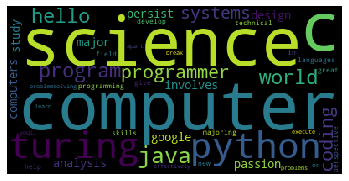

In [9]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!